In [47]:
import pandas as pd

In [48]:



import os
import pandas as pd

FOLDER_ID = '1arXm00WtQe2KNTOfNwKRhA96_nPBi7mt'

DATA_PATH = './dataset'
os.makedirs(DATA_PATH, exist_ok=True)

!gdown --folder https://drive.google.com/drive/folders/{FOLDER_ID} -O {DATA_PATH}

def safe_read_csv(path):
    return pd.read_csv(path, engine='python', on_bad_lines='skip')

required_files = ['train.csv', 'test.csv', 'sample_test_out.csv', 'sample_test.csv']
for filename in required_files:
    filepath = os.path.join(DATA_PATH, filename)
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"Expected file {filename} not found in {DATA_PATH}")

train = safe_read_csv(os.path.join(DATA_PATH, 'train.csv'))
test = safe_read_csv(os.path.join(DATA_PATH, 'test.csv'))
sample_test_out = safe_read_csv(os.path.join(DATA_PATH, 'sample_test_out.csv'))
sample_test = safe_read_csv(os.path.join(DATA_PATH, 'sample_test.csv'))

print("Datasets loaded successfully from:", DATA_PATH)

OUTDIR = './outputs'
os.makedirs(OUTDIR, exist_ok=True)


Retrieving folder contents
Processing file 1PXGPK0cJpdvJ-KutL8vQpK8J6DRf6s6l sample_test_out.csv
Processing file 1saU23PBjm170HTpG7he5oENs-kE4tkw5 sample_test.csv
Processing file 1bTRYPZLonVbZMGTzJjTlFEdFIWCp_-dh test.csv
Processing file 1vmCfAvXmtLb-349EScCpYvKe0R4XPk5o train.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1PXGPK0cJpdvJ-KutL8vQpK8J6DRf6s6l
To: /content/dataset/sample_test_out.csv
100% 2.50k/2.50k [00:00<00:00, 7.71MB/s]
Downloading...
From: https://drive.google.com/uc?id=1saU23PBjm170HTpG7he5oENs-kE4tkw5
To: /content/dataset/sample_test.csv
100% 106k/106k [00:00<00:00, 73.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bTRYPZLonVbZMGTzJjTlFEdFIWCp_-dh
To: /content/dataset/test.csv
100% 73.2M/73.2M [00:00<00:00, 152MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vmCfAvXmtLb-349EScCpYvKe0R4XPk5o
To: /content/dataset/train.csv
100% 73.5M

In [49]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample test shape:", sample_test.shape)
print("Sample test out shape:", sample_test_out.shape)

Train shape: (75000, 4)
Test shape: (75000, 3)
Sample test shape: (100, 3)
Sample test out shape: (100, 2)


In [50]:
print(train.head())
print(test.head())
print(sample_test.head())
print(sample_test_out.head())

   sample_id                                    catalog_content  \
0      33127  Item Name: La Victoria Green Taco Sauce Mild, ...   
1     198967  Item Name: Salerno Cookies, The Original Butte...   
2     261251  Item Name: Bear Creek Hearty Soup Bowl, Creamy...   
3      55858  Item Name: Judee’s Blue Cheese Powder 11.25 oz...   
4     292686  Item Name: kedem Sherry Cooking Wine, 12.7 Oun...   

                                          image_link  price  
0  https://m.media-amazon.com/images/I/51mo8htwTH...   4.89  
1  https://m.media-amazon.com/images/I/71YtriIHAA...  13.12  
2  https://m.media-amazon.com/images/I/51+PFEe-w-...   1.97  
3  https://m.media-amazon.com/images/I/41mu0HAToD...  30.34  
4  https://m.media-amazon.com/images/I/41sA037+Qv...  66.49  
   sample_id                                    catalog_content  \
0     100179  Item Name: Rani 14-Spice Eshamaya's Mango Chut...   
1     245611  Item Name: Natural MILK TEA Flavoring extract ...   
2     146263  Item Name:

In [51]:
print("Train info:")
print(train.info())
print("\nTest info:")
print(test.info())

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        75000 non-null  int64  
 1   catalog_content  75000 non-null  object 
 2   image_link       75000 non-null  object 
 3   price            75000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB
None

Test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sample_id        75000 non-null  int64 
 1   catalog_content  75000 non-null  object
 2   image_link       75000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [52]:
print("\nMissing values in train:")
print(train.isnull().sum())
print("\nMissing values in test:")
print(test.isnull().sum())


Missing values in train:
sample_id          0
catalog_content    0
image_link         0
price              0
dtype: int64

Missing values in test:
sample_id          0
catalog_content    0
image_link         0
dtype: int64


In [53]:
print("Duplicates in train:", train.duplicated().sum())
print("Duplicates in test:", test.duplicated().sum())


Duplicates in train: 0
Duplicates in test: 0


Train text length stats:
 count    75000.000000
mean       908.886547
std        852.896151
min         32.000000
25%        251.000000
50%        643.000000
75%       1280.000000
max       7894.000000
Name: text_len, dtype: float64
Test text length stats:
 count    75000.000000
mean       910.762947
std        857.030190
min         37.000000
25%        252.000000
50%        636.000000
75%       1288.000000
max      11136.000000
Name: text_len, dtype: float64


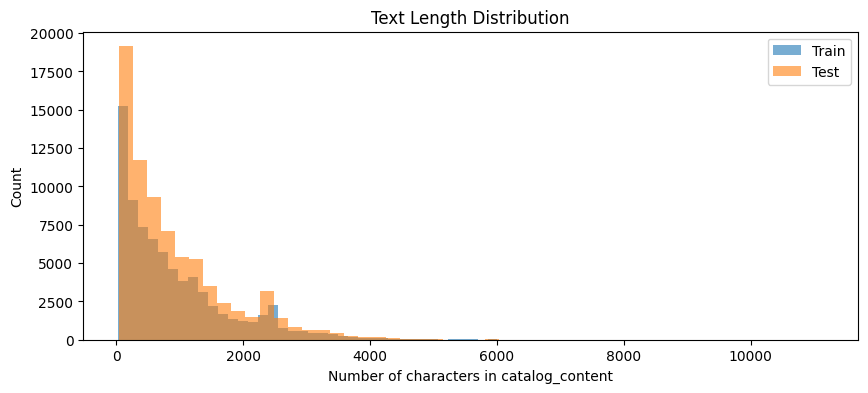

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

train['text_len'] = train['catalog_content'].astype(str).apply(len)
test['text_len'] = test['catalog_content'].astype(str).apply(len)


print("Train text length stats:\n", train['text_len'].describe())
print("Test text length stats:\n", test['text_len'].describe())

plt.figure(figsize=(10,4))
plt.hist(train['text_len'], bins=50, alpha=0.6, label='Train')
plt.hist(test['text_len'], bins=50, alpha=0.6, label='Test')
plt.xlabel('Number of characters in catalog_content')
plt.ylabel('Count')
plt.title('Text Length Distribution')
plt.legend()
plt.show()


In [55]:

structured_features = ['Value', 'Unit']
text_features = ['catalog_content', 'Item Name', 'description', 'bullet_points']


In [56]:
import re
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def extract_value_unit(text):
    value = None
    unit = None

    match_value = re.search(r"Value:\s*([0-9\.]+)", str(text))
    if match_value:
        value = float(match_value.group(1))
    match_unit = re.search(r"Unit:\s*([A-Za-z]+)", str(text))
    if match_unit:
        unit = match_unit.group(1)

    return value, unit

train[['Value','Unit']] = train['catalog_content'].apply(lambda x: pd.Series(extract_value_unit(x)))
test[['Value','Unit']] = test['catalog_content'].apply(lambda x: pd.Series(extract_value_unit(x)))

print(train[['Value','Unit']].head())


le_unit = LabelEncoder()
train['Unit_encoded'] = le_unit.fit_transform(train['Unit'].astype(str))
test['Unit_encoded'] = test['Unit'].map(lambda x: le_unit.transform([x])[0] if x in le_unit.classes_ else -1)

print(dict(zip(le_unit.classes_, le_unit.transform(le_unit.classes_))))


   Value   Unit
0  72.00     Fl
1  32.00  Ounce
2  11.40  Ounce
3  11.25  Ounce
4  12.00  Count
{'BOX': np.int64(0), 'Bag': np.int64(1), 'Bottle': np.int64(2), 'Box': np.int64(3), 'Bucket': np.int64(4), 'CASE': np.int64(5), 'COUNT': np.int64(6), 'CT': np.int64(7), 'Can': np.int64(8), 'Carton': np.int64(9), 'Comes': np.int64(10), 'Count': np.int64(11), 'Each': np.int64(12), 'FL': np.int64(13), 'Fl': np.int64(14), 'Fluid': np.int64(15), 'Foot': np.int64(16), 'Gram': np.int64(17), 'Grams': np.int64(18), 'Jar': np.int64(19), 'K': np.int64(20), 'LB': np.int64(21), 'Liters': np.int64(22), 'None': np.int64(23), 'OZ': np.int64(24), 'Ounce': np.int64(25), 'Ounces': np.int64(26), 'Oz': np.int64(27), 'PACK': np.int64(28), 'Pack': np.int64(29), 'Packs': np.int64(30), 'Paper': np.int64(31), 'Per': np.int64(32), 'Piece': np.int64(33), 'Pouch': np.int64(34), 'Pound': np.int64(35), 'Pounds': np.int64(36), 'Sq': np.int64(37), 'Tea': np.int64(38), 'Ziplock': np.int64(39), 'bag': np.int64(40), 'bottle': 

In [57]:
import os
import pandas as pd

os.makedirs('../outputs', exist_ok=True)

experiment_log = pd.DataFrame(columns=[
    'experiment_id', 'features_used', 'preprocessing_steps',
    'model', 'params', 'mae', 'rmse', 'notes'
])

experiment_log.to_csv('../outputs/experiment_log.csv', index=False)


def log_experiment(experiment_id, features_used, preprocessing_steps, model, params, mae=None, rmse=None, notes=''):
    global experiment_log
    experiment_log = experiment_log.append({
        'experiment_id': experiment_id,
        'features_used': features_used,
        'preprocessing_steps': preprocessing_steps,
        'model': model,
        'params': str(params),
        'mae': mae,
        'rmse': rmse,
        'notes': notes
    }, ignore_index=True)
    experiment_log.to_csv('../outputs/experiment_log.csv', index=False)


In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

unit_mapping_normalized = {

    'fl': 'fl_oz', 'FL': 'fl_oz', 'Fl': 'fl_oz', 'fluid': 'fl_oz',

    'ounce': 'oz', 'Ounce': 'oz', 'Ounces': 'oz', 'oz': 'oz',


    'count': 'count', 'Count': 'count', 'piece': 'count', 'Each': 'count',

    'bottle': 'bottle', 'Bottle': 'bottle', 'bottles': 'bottle',

    'box': 'box', 'Box': 'box', 'BOX': 'box',

    'bag': 'bag', 'Bag': 'bag', 'bags': 'bag',
    'jar': 'jar', 'Jar': 'jar',
    'kg': 'kg', 'KG': 'kg',
    'g': 'g', 'gram': 'g', 'grams': 'g', 'Gram': 'g',
    'l': 'liter', 'L': 'liter', 'ltr': 'liter', 'Liters': 'liter'
}

train['Unit_norm'] = train['Unit'].map(lambda x: unit_mapping_normalized.get(str(x).strip(), str(x).lower()))
test['Unit_norm'] = test['Unit'].map(lambda x: unit_mapping_normalized.get(str(x).strip(), str(x).lower()))

print(train[['Unit','Unit_norm']].head(10))
print(test[['Unit','Unit_norm']].head(10))

le_unit = LabelEncoder()
train['Unit_encoded'] = le_unit.fit_transform(train['Unit_norm'])

test['Unit_encoded'] = test['Unit_norm'].map(lambda x: le_unit.transform([x])[0] if x in le_unit.classes_ else -1)

unit_mapping_final = dict(zip(le_unit.classes_, le_unit.transform(le_unit.classes_)))
print("Final Unit Encoding Mapping:", unit_mapping_final)


    Unit Unit_norm
0     Fl     fl_oz
1  Ounce        oz
2  Ounce        oz
3  Ounce        oz
4  Count     count
5  ounce        oz
6  Ounce        oz
7  Count     count
8     Fl     fl_oz
9  Ounce        oz
    Unit Unit_norm
0  Ounce        oz
1     Fl     fl_oz
2  Ounce        oz
3  Count     count
4     Fl     fl_oz
5  Ounce        oz
6  Ounce        oz
7  Count     count
8     oz        oz
9  Ounce        oz
Final Unit Encoding Mapping: {'bag': np.int64(0), 'bottle': np.int64(1), 'box': np.int64(2), 'bucket': np.int64(3), 'can': np.int64(4), 'capsule': np.int64(5), 'carton': np.int64(6), 'case': np.int64(7), 'cm': np.int64(8), 'comes': np.int64(9), 'count': np.int64(10), 'ct': np.int64(11), 'each': np.int64(12), 'fl_oz': np.int64(13), 'fluid': np.int64(14), 'foot': np.int64(15), 'g': np.int64(16), 'gr': np.int64(17), 'gramm': np.int64(18), 'grams': np.int64(19), 'in': np.int64(20), 'jar': np.int64(21), 'k': np.int64(22), 'kg': np.int64(23), 'lb': np.int64(24), 'liter': np.int64(2

In [59]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


In [61]:
def clean_text(text, remove_stopwords=False):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    if remove_stopwords:
        tokens = text.split()
        tokens = [w for w in tokens if w not in stop_words]
        text = " ".join(tokens)

    return text

In [62]:
train['clean_text'] = train['catalog_content'].apply(lambda x: clean_text(x, remove_stopwords=False))
test['clean_text'] = test['catalog_content'].apply(lambda x: clean_text(x, remove_stopwords=False))

def extract_item_name(text):

    try:
        if "Item Name:" in text:
            name_part = text.split("Item Name:")[1]
            name_part = name_part.split("Bullet Point")[0]
            return clean_text(name_part)
        else:
            return ""
    except:
        return ""

train['item_name_clean'] = train['catalog_content'].apply(extract_item_name)
test['item_name_clean'] = test['catalog_content'].apply(extract_item_name)


In [63]:

train['clean_text'] = train['clean_text'].apply(lambda x: clean_text(x, remove_stopwords=True))
test['clean_text'] = test['clean_text'].apply(lambda x: clean_text(x, remove_stopwords=True))
train['item_name_clean'] = train['item_name_clean'].apply(lambda x: clean_text(x, remove_stopwords=True))
test['item_name_clean'] = test['item_name_clean'].apply(lambda x: clean_text(x, remove_stopwords=True))


In [64]:
train['text_feature'] = train['item_name_clean'] + " " + train['clean_text']
test['text_feature'] = test['item_name_clean'] + " " + test['clean_text']

print("Sample train text feature:")
print(train['text_feature'].head())
print("\nSample test text feature:")
print(test['text_feature'].head())

Sample train text feature:
0    la victoria green taco sauce mild 12 ounce pac...
1    salerno cookies original butter cookies 8 ounc...
2    bear creek hearty soup bowl creamy chicken ric...
3    judee blue cheese powder 11 25 oz gluten free ...
4    kedem sherry cooking wine 12 7 ounce 12 per ca...
Name: text_feature, dtype: object

Sample test text feature:
0    rani 14 spice eshamaya mango chutney indian pr...
1    natural milk tea flavoring extract halo pantry...
2    honey filled hard candy bulk pack 2 pounds ind...
3    vlasic snack mm kosher dill 16 oz pack 2 value...
4    mccormick culinary vanilla extract 32 fl oz on...
Name: text_feature, dtype: object


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [66]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)


In [67]:
X_train_text = tfidf.fit_transform(train['text_feature'])

X_test_text = tfidf.transform(test['text_feature'])

print("TF-IDF shape - Train:", X_train_text.shape)
print("TF-IDF shape - Test:", X_test_text.shape)


TF-IDF shape - Train: (75000, 5000)
TF-IDF shape - Test: (75000, 5000)


In [68]:
from scipy.sparse import hstack

X_train_struct = train[['Value', 'Unit_encoded']].fillna(0).values
X_test_struct = test[['Value', 'Unit_encoded']].fillna(0).values
X_train = hstack([X_train_text, X_train_struct])
X_test = hstack([X_test_text, X_test_struct])

print("Final feature shape - Train:", X_train.shape)
print("Final feature shape - Test:", X_test.shape)


Final feature shape - Train: (75000, 5002)
Final feature shape - Test: (75000, 5002)


In [69]:
import os
import joblib

os.makedirs("data", exist_ok=True)

joblib.dump(X_train, "data/X_train_preprocessed.pkl")
joblib.dump(X_test, "data/X_test_preprocessed.pkl")

joblib.dump(train['price'].values, "data/y_train.pkl")

joblib.dump(tfidf, "data/tfidf_vectorizer.pkl")

train.to_csv("data/train_preprocessed.csv", index=False)
test.to_csv("data/test_preprocessed.csv", index=False)

print("Preprocessed features and data saved successfully!")


Preprocessed features and data saved successfully!


In [70]:

train['text_len'] = train['text_feature'].apply(len)
test['text_len'] = test['text_feature'].apply(len)

train['num_digits'] = train['catalog_content'].apply(lambda x: sum(c.isdigit() for c in str(x)))
test['num_digits'] = test['catalog_content'].apply(lambda x: sum(c.isdigit() for c in str(x)))

train['num_tokens'] = train['text_feature'].apply(lambda x: len(str(x).split()))
test['num_tokens'] = test['text_feature'].apply(lambda x: len(str(x).split()))

print(train[['text_len','num_digits','num_tokens']].head())


   text_len  num_digits  num_tokens
0       153           6          34
1       506          17          80
2       357          12          68
3      1171          17         175
4       191          13          39


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_name = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
X_train_name = tfidf_name.fit_transform(train['item_name_clean'])
X_test_name = tfidf_name.transform(test['item_name_clean'])

tfidf_desc = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_desc = tfidf_desc.fit_transform(train['clean_text'])
X_test_desc = tfidf_desc.transform(test['clean_text'])

tfidf_char = TfidfVectorizer(analyzer='char', ngram_range=(3,5), max_features=2000)
X_train_char = tfidf_char.fit_transform(train['clean_text'])
X_test_char = tfidf_char.transform(test['clean_text'])


In [72]:
from scipy.sparse import hstack, csr_matrix

X_train_struct = csr_matrix(train[['Value','Unit_encoded','text_len','num_digits','num_tokens']].fillna(0).values)
X_test_struct  = csr_matrix(test[['Value','Unit_encoded','text_len','num_digits','num_tokens']].fillna(0).values)

X_train = hstack([X_train_name, X_train_desc, X_train_char, X_train_struct]).tocsr()
X_test  = hstack([X_test_name, X_test_desc, X_test_char, X_test_struct]).tocsr()

print("Final combined feature shape - Train:", X_train.shape)
print("Final combined feature shape - Test:", X_test.shape)


Final combined feature shape - Train: (75000, 9005)
Final combined feature shape - Test: (75000, 9005)


In [73]:
import sys
print(sys.executable)


/usr/bin/python3


In [74]:
import lightgbm as lgb
print(lgb.__version__)


4.6.0


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import joblib
from scipy.sparse import csr_matrix


def smape(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / np.where(denominator == 0, 1, denominator)
    return np.mean(diff) * 100

def smape_lgbm(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / np.where(denominator == 0, 1, denominator)
    return "SMAPE", np.mean(diff) * 100, False


print("Loading preprocessed data...")
train = safe_read_csv(os.path.join(DATA_PATH, 'train.csv'))
test = safe_read_csv(os.path.join(DATA_PATH, 'test.csv'))

X_train = joblib.load("data/X_train_preprocessed.pkl").tocsr()
X_test  = joblib.load("data/X_test_preprocessed.pkl").tocsr()

print("Train:", X_train.shape, " Test:", X_test.shape)

y = np.log1p(train['price'].values)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(X_train.shape[0])
test_preds = np.zeros(X_test.shape[0])

oof_preds = np.zeros(X_train.shape[0])
test_preds = np.zeros(X_test.shape[0])

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\n Training Fold {fold+1}/{kf.n_splits}")

    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    model = lgb.LGBMRegressor(
        n_estimators=800,
        learning_rate=0.05,
        max_depth=-1,
        subsample=0.7,
        colsample_bytree=0.7,
        random_state=42,
        n_jobs=-1
    )

    model.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        eval_metric=smape_lgbm,
        callbacks=[
            lgb.early_stopping(stopping_rounds=30),
            lgb.log_evaluation(period=100)
        ]
    )

    oof_preds[val_idx] = model.predict(X_val)

    test_preds += model.predict(X_test) / kf.n_splits

y_true = np.expm1(y)
y_pred = np.expm1(oof_preds)

mae_score = mean_absolute_error(y_true, y_pred)
smape_score = smape(y_true, y_pred)

print("\n")
print(f"MAE:   {mae_score:.4f}")
print(f"SMAPE: {smape_score:.4f}%")

test_preds_final = np.expm1(test_preds)

submission = pd.DataFrame({
    "id": np.arange(len(test_preds_final)),
    "price": test_preds_final
})

submission.to_csv("test_out.csv", index=False)


Loading preprocessed data...
Train: (75000, 5002)  Test: (75000, 5002)

🟢 Training Fold 1/5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 6.850550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715782
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 5002
[LightGBM] [Info] Start training from score 2.740904
Training until validation scores don't improve for 30 rounds
[100]	valid_0's l2: 0.550686	valid_0's SMAPE: 23.0277
[200]	valid_0's l2: 0.516462	valid_0's SMAPE: 22.1734
[300]	valid_0's l2: 0.502965	valid_0's SMAPE: 21.7991
[400]	valid_0's l2: 0.494946	valid_0's SMAPE: 21.5718
[500]	valid_0's l2: 0.489048	valid_0's SMAPE: 21.3996
[600]	valid_0's l2: 0.4852	valid_0's SMAPE: 21.2749
[700]	valid_0's l2: 0.48237	valid_0's SMAPE: 21.1832
[800]	valid_0's l2: 0.480372	valid_0's SMAPE: 21.1159
Did not meet early stopping. Best iteration is:
[800]	valid_0's l2: 0.48

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



🟢 Training Fold 2/5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 5.989776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 714688
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 5002
[LightGBM] [Info] Start training from score 2.738173
Training until validation scores don't improve for 30 rounds
[100]	valid_0's l2: 0.523985	valid_0's SMAPE: 22.4212
[200]	valid_0's l2: 0.490783	valid_0's SMAPE: 21.5581
[300]	valid_0's l2: 0.477718	valid_0's SMAPE: 21.2117
[400]	valid_0's l2: 0.469739	valid_0's SMAPE: 20.9876
[500]	valid_0's l2: 0.464394	valid_0's SMAPE: 20.8308
[600]	valid_0's l2: 0.460926	valid_0's SMAPE: 20.7337
[700]	valid_0's l2: 0.457658	valid_0's SMAPE: 20.6351
[800]	valid_0's l2: 0.455875	valid_0's SMAPE: 20.5692
Did not meet early stopping. Best iteration is:
[800]	valid_0's l2: 0.455875	valid_0's SMAPE: 20.5692


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



🟢 Training Fold 3/5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 6.845082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715807
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 5002
[LightGBM] [Info] Start training from score 2.741725
Training until validation scores don't improve for 30 rounds
[100]	valid_0's l2: 0.528521	valid_0's SMAPE: 22.6873
[200]	valid_0's l2: 0.496304	valid_0's SMAPE: 21.883
[300]	valid_0's l2: 0.483162	valid_0's SMAPE: 21.5206
[400]	valid_0's l2: 0.475978	valid_0's SMAPE: 21.3095
[500]	valid_0's l2: 0.471603	valid_0's SMAPE: 21.1824
[600]	valid_0's l2: 0.467938	valid_0's SMAPE: 21.0723
[700]	valid_0's l2: 0.465618	valid_0's SMAPE: 20.9906
[800]	valid_0's l2: 0.463379	valid_0's SMAPE: 20.9074
Did not meet early stopping. Best iteration is:
[798]	valid_0's l2: 0.46334	valid_0's SMAPE: 20.9074


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



🟢 Training Fold 4/5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 7.623455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715054
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 5002
[LightGBM] [Info] Start training from score 2.737836
Training until validation scores don't improve for 30 rounds
[100]	valid_0's l2: 0.507855	valid_0's SMAPE: 22.0749
[200]	valid_0's l2: 0.477148	valid_0's SMAPE: 21.2506
[300]	valid_0's l2: 0.464893	valid_0's SMAPE: 20.8932
[400]	valid_0's l2: 0.458347	valid_0's SMAPE: 20.6898
[500]	valid_0's l2: 0.454011	valid_0's SMAPE: 20.5526
[600]	valid_0's l2: 0.450799	valid_0's SMAPE: 20.445
[700]	valid_0's l2: 0.448435	valid_0's SMAPE: 20.3626
[800]	valid_0's l2: 0.44701	valid_0's SMAPE: 20.3097
Did not meet early stopping. Best iteration is:
[800]	valid_0's l2: 0.44701	valid_0's SMAPE: 20.3097


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



🟢 Training Fold 5/5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 6.853829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 715314
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 5002
[LightGBM] [Info] Start training from score 2.737449
Training until validation scores don't improve for 30 rounds
[100]	valid_0's l2: 0.532553	valid_0's SMAPE: 22.5696
[200]	valid_0's l2: 0.500093	valid_0's SMAPE: 21.7295
[300]	valid_0's l2: 0.486993	valid_0's SMAPE: 21.3409
[400]	valid_0's l2: 0.47955	valid_0's SMAPE: 21.1144
[500]	valid_0's l2: 0.474207	valid_0's SMAPE: 20.9502
[600]	valid_0's l2: 0.470905	valid_0's SMAPE: 20.8361


In [ ]:
import os
import pandas as pd
import numpy as np

test_preds_final = np.expm1(test_preds)
os.makedirs("data", exist_ok=True)

if 'sample_id' in test.columns:
    submission = pd.DataFrame({
        "sample_id": test['sample_id'],
        "price": test_preds_final
    })
else:
    print(" Warning: 'sample_id' not found in test set, using row index instead.")
    submission = pd.DataFrame({
        "sample_id": np.arange(len(test_preds_final)),
        "price": test_preds_final
    })

submission_file = "data/test_out.csv"
counter = 1
while os.path.exists(submission_file):
    submission_file = f"data/submission_final_{counter}.csv"
    counter += 1

submission.to_csv(submission_file, index=False)

print(f"Submission saved successfully at: {os.path.abspath(submission_file)}")
print(f"Number of predictions: {len(submission)}")
